<a href="https://colab.research.google.com/github/Saul-Ochoa/Predicci-n-de-Precios-m-viles/blob/main/Predicci%C3%B3n_de_Precios_m%C3%B3viles.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Autores:

*   Saúl Kevin Ochoa Salazar





# Explicación del caso

**Contexto**

Bob ha comenzado su propia empresa de telefonía móvil. Quiere dar una pelea dura a las grandes empresas como Apple, Samsung, etc.

No sabe cómo estimar el precio de los móviles que fabrica su empresa. En este competitivo mercado de telefonía móvil no se puede simplemente asumir cosas. Para resolver este problema, recopila datos de ventas de teléfonos móviles de varias empresas.

Bob quiere averiguar alguna relación entre las funciones de un teléfono móvil (p. ej., RAM, memoria interna, etc.) y su precio de venta. Pero no es tan bueno en Machine Learning. Así que necesita tu ayuda para resolver este problema.
En este problema, no tiene que predecir el precio real, sino un rango de precios que indica qué tan alto es el precio.



1.   Analisis de Variables
2.   Analisis Exploratorio
3.   Pre-procesamiento - Transformaciones
4.   Procesamiento y Modelamiento, evaluacion de metricas y resultados.





In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

In [ ]:
url_train='https://docs.google.com/spreadsheets/d/e/2PACX-1vShC1wDQ0fE2tolKijwlYpj_VYk71wXFnq7ulRxiKkm0aNlzI7TRGZTiycHYqByiTZmXpsFKppTkbaA/pub?gid=1850624394&single=true&output=csv'

In [ ]:
url_test='https://docs.google.com/spreadsheets/d/e/2PACX-1vQ8oaUzVoIHkk44EMxq6AcycJH3J0D8Jzfd7FOMxbuFL9ftMdA9vWP2EVLJ1q8ZxYhat2bfnffL1nlx/pub?gid=1404929852&single=true&output=csv'

In [ ]:
train=pd.read_csv(url_train)
test=pd.read_csv(url_test)

# Analisis de Variables

In [ ]:
train.head()

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,...,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
0,842,0,2.2,0,1,0,7,0.6,188,2,...,20,756,2549,9,7,19,0,0,1,1
1,1021,1,0.5,1,0,1,53,0.7,136,3,...,905,1988,2631,17,3,7,1,1,0,2
2,563,1,0.5,1,2,1,41,0.9,145,5,...,1263,1716,2603,11,2,9,1,1,0,2
3,615,1,2.5,0,0,0,10,0.8,131,6,...,1216,1786,2769,16,8,11,1,0,0,2
4,1821,1,1.2,0,13,1,44,0.6,141,2,...,1208,1212,1411,8,2,15,1,1,0,1


In [ ]:
train.shape

(2000, 21)

In [ ]:
train.isna().sum()

battery_power    0
blue             0
clock_speed      0
dual_sim         0
fc               0
four_g           0
int_memory       0
m_dep            0
mobile_wt        0
n_cores          0
pc               0
px_height        0
px_width         0
ram              0
sc_h             0
sc_w             0
talk_time        0
three_g          0
touch_screen     0
wifi             0
price_range      0
dtype: int64

In [ ]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   battery_power  2000 non-null   int64  
 1   blue           2000 non-null   int64  
 2   clock_speed    2000 non-null   float64
 3   dual_sim       2000 non-null   int64  
 4   fc             2000 non-null   int64  
 5   four_g         2000 non-null   int64  
 6   int_memory     2000 non-null   int64  
 7   m_dep          2000 non-null   float64
 8   mobile_wt      2000 non-null   int64  
 9   n_cores        2000 non-null   int64  
 10  pc             2000 non-null   int64  
 11  px_height      2000 non-null   int64  
 12  px_width       2000 non-null   int64  
 13  ram            2000 non-null   int64  
 14  sc_h           2000 non-null   int64  
 15  sc_w           2000 non-null   int64  
 16  talk_time      2000 non-null   int64  
 17  three_g        2000 non-null   int64  
 18  touch_sc

In [ ]:
train.shape

(2000, 21)

In [ ]:
train.describe()

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,...,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
count,2000.000000,2000.0000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,...,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000
mean,1238.518500,0.4950,1.522250,0.509500,4.309500,0.521500,32.046500,0.501750,140.249000,4.520500,...,645.108000,1251.515500,2124.213000,12.306500,5.767000,11.011000,0.761500,0.503000,0.507000,1.500000
std,439.418206,0.5001,0.816004,0.500035,4.341444,0.499662,18.145715,0.288416,35.399655,2.287837,...,443.780811,432.199447,1084.732044,4.213245,4.356398,5.463955,0.426273,0.500116,0.500076,1.118314
min,501.000000,0.0000,0.500000,0.000000,0.000000,0.000000,2.000000,0.100000,80.000000,1.000000,...,0.000000,500.000000,256.000000,5.000000,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000
25%,851.750000,0.0000,0.700000,0.000000,1.000000,0.000000,16.000000,0.200000,109.000000,3.000000,...,282.750000,874.750000,1207.500000,9.000000,2.000000,6.000000,1.000000,0.000000,0.000000,0.750000
50%,1226.000000,0.0000,1.500000,1.000000,3.000000,1.000000,32.000000,0.500000,141.000000,4.000000,...,564.000000,1247.000000,2146.500000,12.000000,5.000000,11.000000,1.000000,1.000000,1.000000,1.500000
75%,1615.250000,1.0000,2.200000,1.000000,7.000000,1.000000,48.000000,0.800000,170.000000,7.000000,...,947.250000,1633.000000,3064.500000,16.000000,9.000000,16.000000,1.000000,1.000000,1.000000,2.250000
max,1998.000000,1.0000,3.000000,1.000000,19.000000,1.000000,64.000000,1.000000,200.000000,8.000000,...,1960.000000,1998.000000,3998.000000,19.000000,18.000000,20.000000,1.000000,1.000000,1.000000,3.000000


# Analisis Exploratorio (EDA)

In [ ]:
train['price_range'].value_counts()/len(train)

1    0.25
2    0.25
3    0.25
0    0.25
Name: price_range, dtype: float64

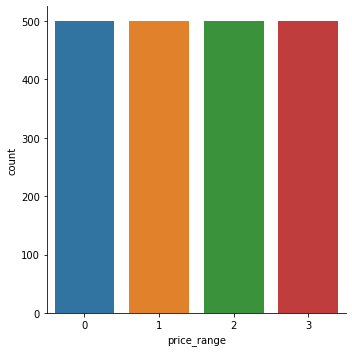

In [ ]:
sns.catplot('price_range',data=train,kind='count')

Relacion del precion con la memoria Ram


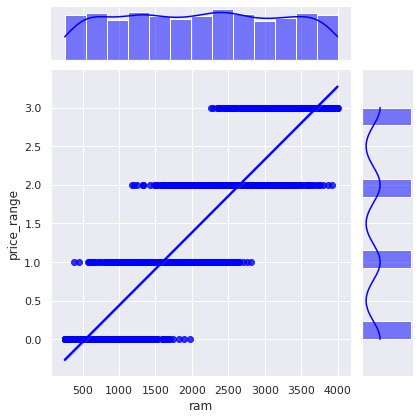

In [ ]:
#como el ram afecta el precio
print('\033[1m' + 'Relacion del precion con la memoria Ram'+'\033[0m')
sns.set(rc={'figure.figsize':(12,8)})
sns.jointplot(x='ram',y='price_range',data=train,color='blue',kind="reg")
plt.show()

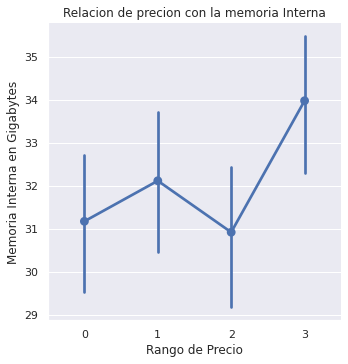

In [ ]:
#como la memoria afecta interan afecta al precio
sns.factorplot(y="int_memory", x="price_range", data=train)
plt.title("Relacion de precion con la memoria Interna")
plt.ylabel("Memoria Interna en Gigabytes")
plt.xlabel("Rango de Precio")
plt.show()

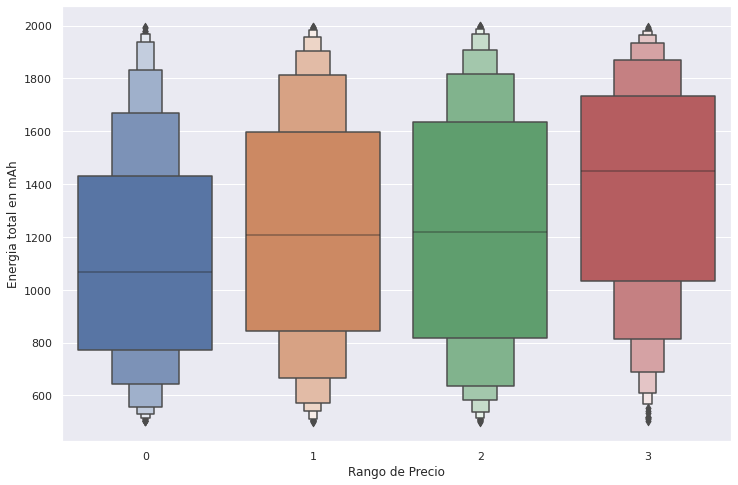

In [ ]:
#Relacion de la bateria con el precio
sns.boxenplot(x='price_range',y='battery_power',data=train)
plt.ylabel('Energia total en mAh')
plt.xlabel('Rango de Precio')
plt.show()

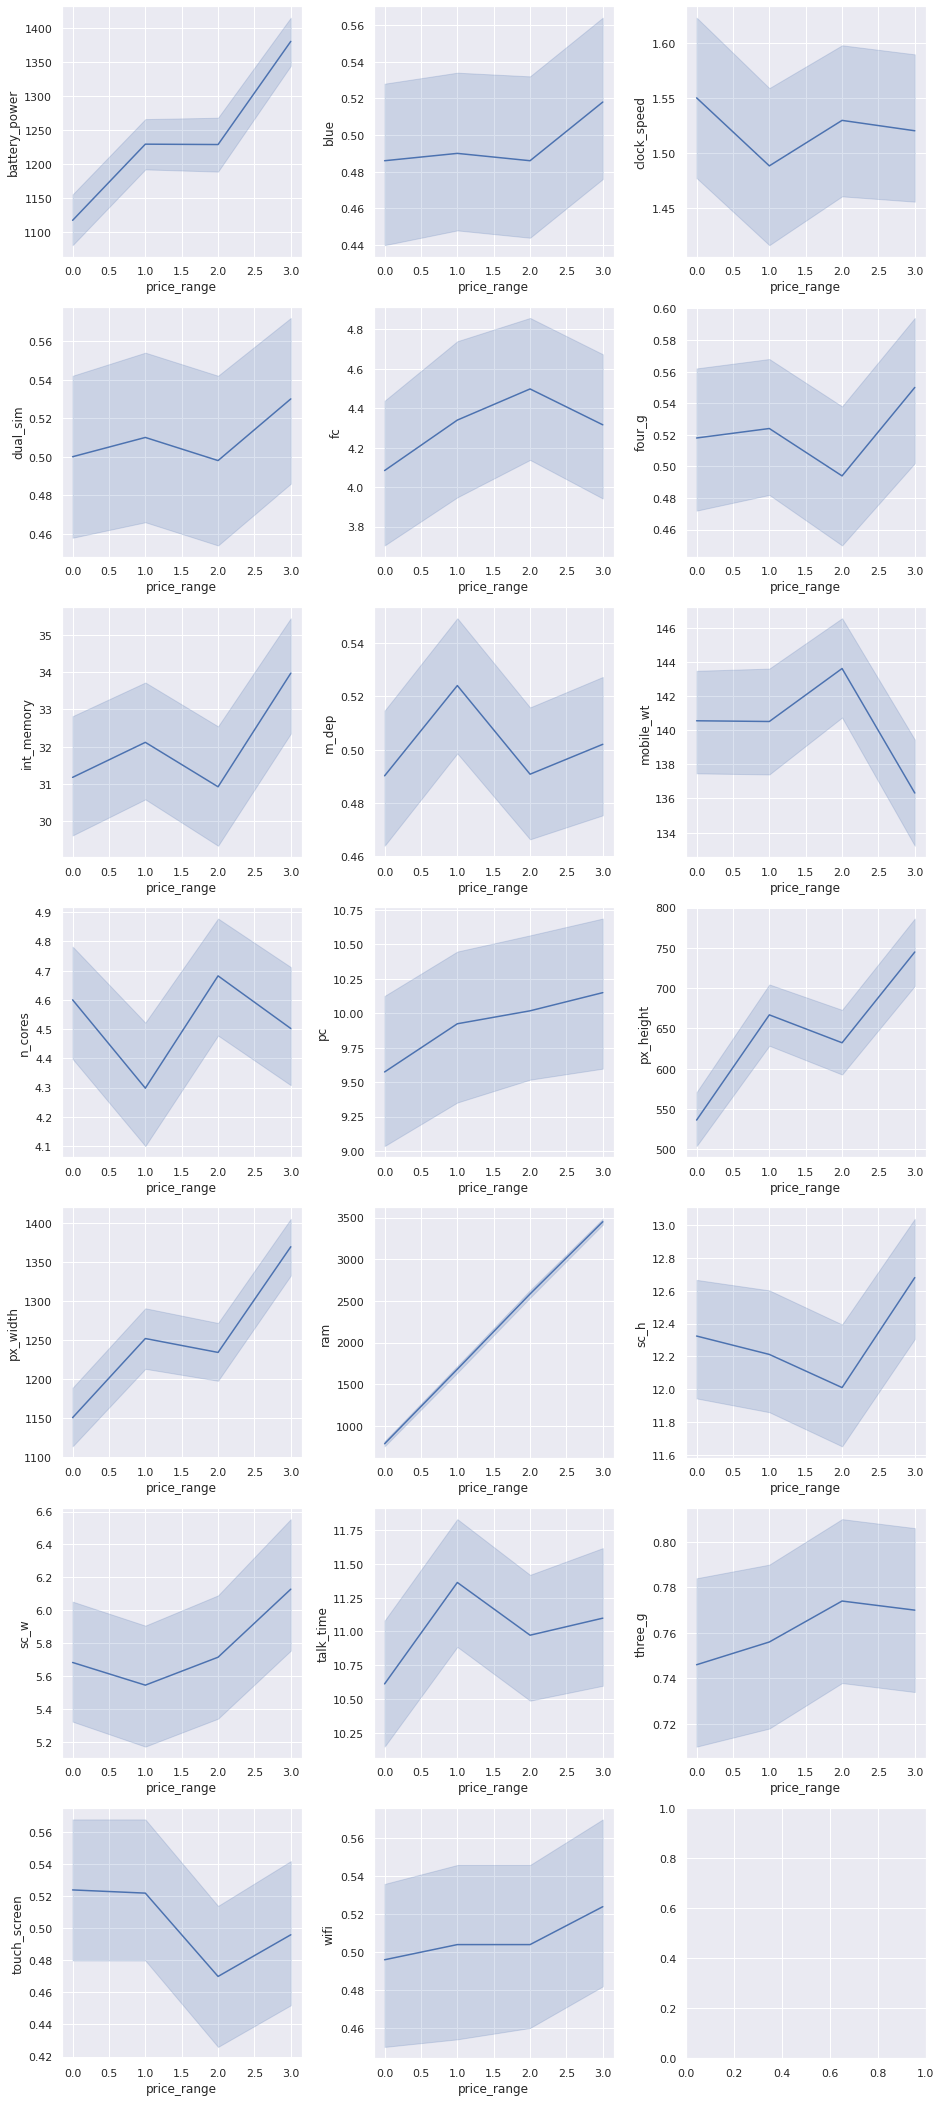

In [ ]:
#Graficas individuales 
columnas = list(train.columns.values)
columnas.remove('price_range')

#Grafico
fig, ax = plt.subplots(7, 3, figsize=(15, 30))
plt.subplots_adjust(left=0.1, bottom=0.05, top=1.0, wspace=0.3, hspace=0.2)
for i, columna in zip(range(len(columnas)), columnas):
    ax = plt.subplot(7,3,i+1)
    sns.lineplot(ax=ax,x='price_range', y=columna, data=train)

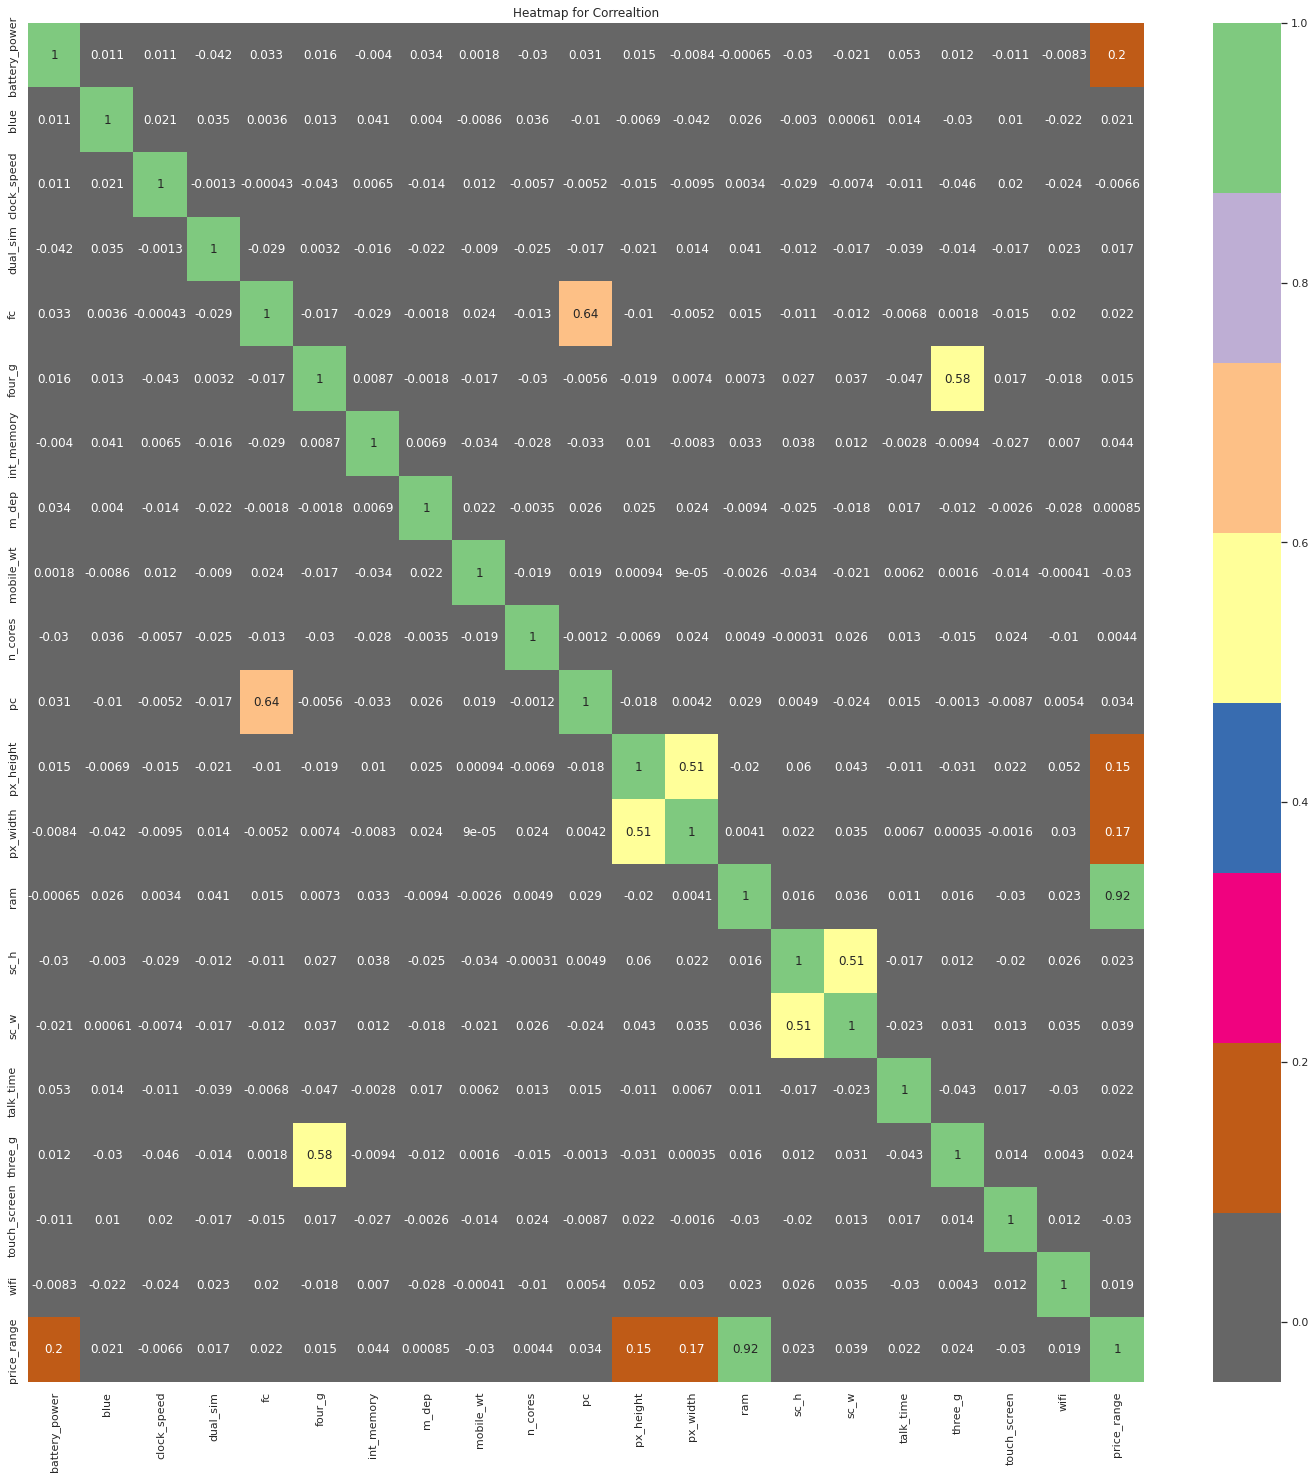

In [ ]:
plt.figure(figsize=(25,25))
sns.heatmap(train.corr(),annot=True,cmap=plt.cm.Accent_r)
plt.title('Heatmap for Correaltion')
plt.show()

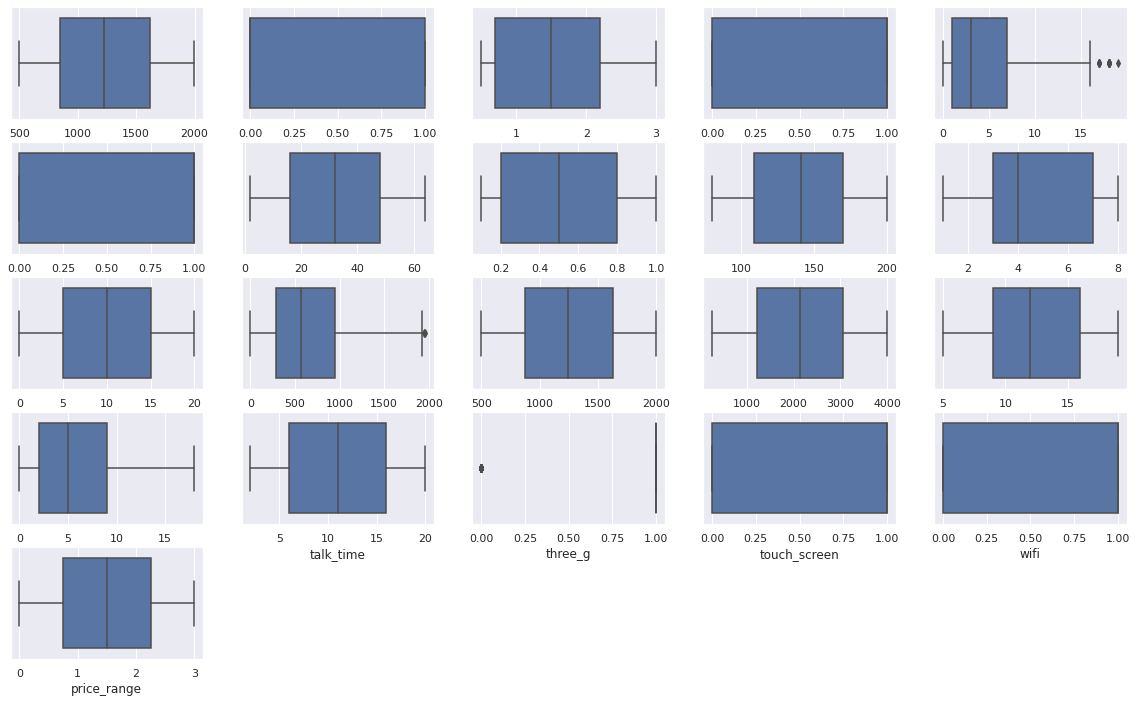

In [ ]:
plt.figure(figsize=(20,12))
for index,item in enumerate([i for i in train.describe().columns.to_list()] ):
  plt.subplot(5,5,index+1)
  sns.boxplot(train[item])
print("\n")

# Pre-procesamiento - Transformaciones

In [ ]:
#se elimina la columna del rango de precio
X=train.drop('price_range',axis=1)
X.sample(5)

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,pc,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi
742,1822,0,1.2,0,0,0,8,0.2,195,6,0,172,910,2577,9,5,8,1,1,0
1127,618,0,0.6,0,8,0,16,0.2,143,1,14,1105,1602,2262,16,15,4,0,1,0
1256,1747,0,0.5,0,4,0,13,0.7,185,6,12,800,873,3105,7,1,10,1,0,0
1070,1659,1,2.5,0,2,0,41,0.1,88,7,18,787,1515,545,12,0,9,0,1,1
1167,622,0,0.7,0,0,1,9,0.3,127,2,0,98,511,3916,13,1,5,1,0,1


In [ ]:
y=train['price_range']
y.sample(5)

693     1
1093    0
1135    1
790     0
1800    0
Name: price_range, dtype: int64

Splitting the data

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.33,stratify=y,random_state=101)

# Construcción de modelos
Construiremos modelos para verificar si funcionan bien después del preprocesamiento de datos.

# KNN Classifier

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import mean_squared_error

In [ ]:
error_rate = []
# Will take some time
k_values = list(filter(lambda x: x%2==1, range(0,50)))
best_k = 0
for i in k_values:
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(X_train,y_train)
    pred_i = knn.predict(X_test)
    error_rate.append(np.mean(pred_i != y_test))
a=error_rate.index(np.min(error_rate))
print(a)

5


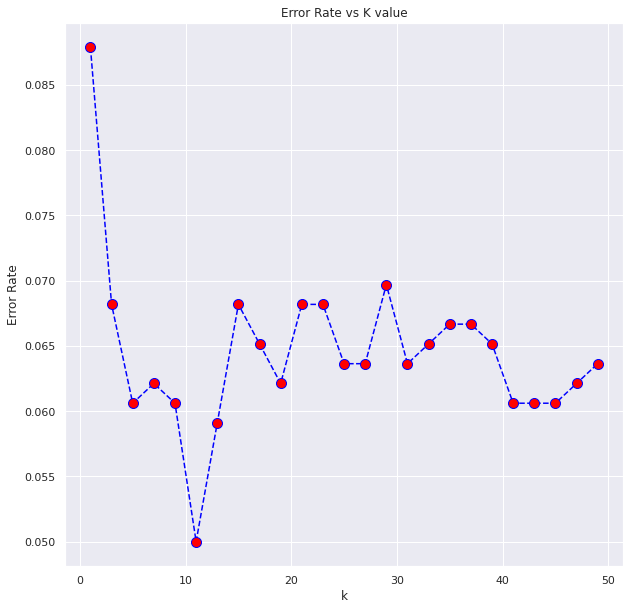

In [ ]:
#This may change if we run this notebook again because we have not set any random state.
plt.figure(figsize=(10,10))
plt.plot(k_values,error_rate,color='blue',linestyle='dashed',marker='o',markerfacecolor='red',markersize=10)
plt.title('Error Rate vs K value')
plt.xlabel('k')
plt.ylabel('Error Rate')
plt.show()

n_neighbors = a*2 + 1

In [ ]:
b=a*2+1
knn_classifier=KNeighborsClassifier(n_neighbors=b)
knn_classifier.fit(X_train,y_train)

KNeighborsClassifier(n_neighbors=11)

In [ ]:
knn_train_score=knn_classifier.score(X_train,y_train)
knn_test_score=knn_classifier.score(X_test,y_test)
print('Train Score: {0}\n Test Score {1}'.format(knn_train_score.round(2),knn_test_score.round(2)))

Train Score: 0.95
 Test Score 0.95


In [ ]:
knn_predict=knn_classifier.predict(X_test)
knn_classifier_mse=mean_squared_error(y_test,knn_predict)
knn_classifier_rmse=np.sqrt(knn_classifier_mse)
print('MSE: {0}\n RMSE: {1}'.format(knn_classifier_mse.round(2),knn_classifier_rmse.round(2)))

MSE: 0.05
 RMSE: 0.22


In [ ]:
from sklearn.metrics import accuracy_score
knn_accuracy=accuracy_score(knn_predict,y_test)
print(knn_accuracy.round(2))

0.95


# Logistic Regression Model

In [ ]:
from sklearn.linear_model import LogisticRegression
logistic_regressor=LogisticRegression()

In [ ]:
logistic_regressor.fit(X_train,y_train)

LogisticRegression()

In [ ]:
logistic_regression_train_score=logistic_regressor.score(X_train,y_train)
logistic_regression_test_score=logistic_regressor.score(X_test,y_test)
print('Train Score:{0}\n Test Score: {1}'.format(logistic_regression_train_score.round(4),logistic_regression_test_score.round(4)))

Train Score:0.6336
 Test Score: 0.6409


In [ ]:
logistic_regression_prediction=logistic_regressor.predict(X_test)
logistic_mse=mean_squared_error(y_test,logistic_regression_prediction)
logistic_rmse=np.sqrt(logistic_mse)
print('MSE:{0}\n RMSE: {1}'.format(logistic_mse.round(4),logistic_rmse.round(4)))

MSE:0.4136
 RMSE: 0.6431


In [ ]:
logistic_regression_accuracy=accuracy_score(logistic_regression_prediction,y_test)
print(logistic_regression_accuracy.round(2))

0.64


#  Training Random Forest

In [ ]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
tree_classifier= RandomForestClassifier(n_estimators=300)

In [ ]:
tree_classifier.fit(X_train,y_train)

RandomForestClassifier(n_estimators=300)

In [ ]:
tree_train_score=tree_classifier.score(X_train,y_train)
tree_test_score=tree_classifier.score(X_test,y_test)
print('Train Score:{0}\n Test Score: {1}'.format(tree_train_score.round(4),tree_test_score.round(4)))

Train Score:1.0
 Test Score: 0.8879


In [ ]:
tree_prediction=tree_classifier.predict(X_test)
tree_mse=mean_squared_error(y_test,tree_prediction)
tree_rmse=np.sqrt(tree_mse)
print('MSE :{}\n RMSE : {}'.format(tree_mse.round(3),tree_rmse.round(3)))

MSE :0.112
 RMSE : 0.335


In [ ]:
tree_accuracy=accuracy_score(tree_prediction,y_test)
print(tree_accuracy.round(2))

0.89


In [ ]:
feature_importance = pd.DataFrame({'Feature':X.columns,
                                   'Score':tree_classifier.feature_importances_}).sort_values(by='Score', ascending=False).reset_index(drop=True)
feature_importance.head()

,Feature,Score
0,ram,0.465090
1,battery_power,0.076540
2,px_width,0.058612
3,px_height,0.056190
4,mobile_wt,0.041190


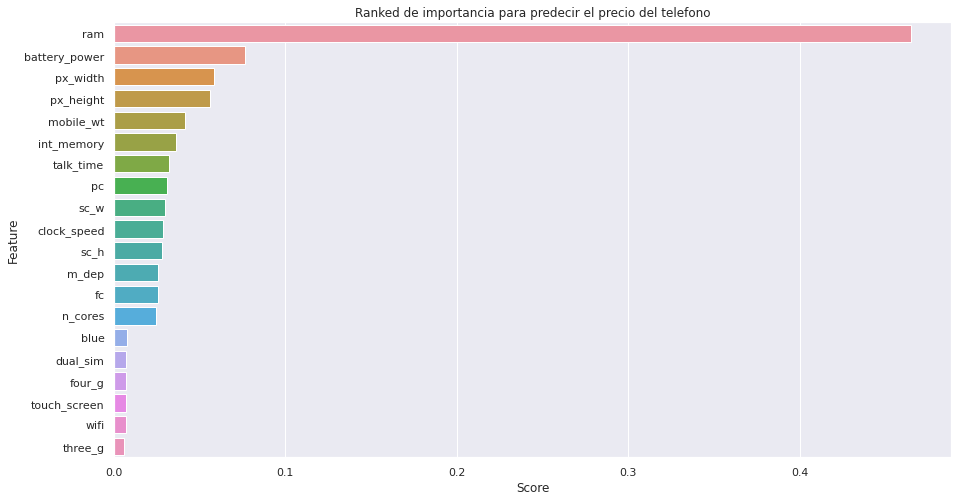

In [ ]:
fig,ax=plt.subplots(figsize=(15,8))
ax=sns.barplot(x=feature_importance['Score'],y=feature_importance['Feature'])
plt.title("Ranked de importancia para predecir el precio del telefono")
plt.show()

# Ensembling with Boosting:- AdaBoostClassifier

In [ ]:
from sklearn.ensemble import AdaBoostClassifier
adaboost_classifier=AdaBoostClassifier(n_estimators=b)
adaboost_classifier.fit(X_train,y_train)

AdaBoostClassifier(n_estimators=11)

In [ ]:
adaboost_train_score=adaboost_classifier.score(X_train,y_train)
adaboost_test_score=adaboost_classifier.score(X_test,y_test)
print('Train score: {}\n Test score :{}'.format(adaboost_train_score.round(3),adaboost_test_score.round(3)))

Train score: 0.581
 Test score :0.589


In [ ]:
adabost_predict=adaboost_classifier.predict(X_test)
adabost_mse=mean_squared_error(y_test,adabost_predict)
adabost_rmse=np.sqrt(adabost_mse)
print('MSE :{}\n RMSE : {}'.format(adabost_mse.round(3),adabost_rmse.round(3)))

MSE :0.42
 RMSE : 0.648


In [ ]:
adabost_accuracy=accuracy_score(adabost_predict,y_test)
print(adabost_accuracy.round(2))

0.59


# Support Vector Classifier

In [ ]:
from sklearn.svm import SVC
svc=SVC(kernel='rbf') #
svc.fit(X_train,y_train)

SVC()

In [ ]:
svc_train_score=svc.score(X_train,y_train)
svc_test_score=svc.score(X_test,y_test)
print('Train Score : {}\n Test Score :{}'.format(svc_train_score.round(3),svc_test_score.round(3)))

Train Score : 0.956
 Test Score :0.939


In [ ]:
svc_prediction=svc.predict(X_test)
svc_mse=mean_squared_error(y_test,svc_prediction)
svc_rmse=np.sqrt(svc_mse)
print('MSE : {}\n RMSE :{}'.format(svc_mse.round(3),svc_rmse.round(3)))

MSE : 0.061
 RMSE :0.246


In [ ]:
svc_accuracy=accuracy_score(svc_prediction,y_test)
print(svc_accuracy.round(2))

0.94


#Comparando el MSE y Acurray de los modelos

#auc

El MSE

In [ ]:
mse_height=[knn_classifier_mse,logistic_mse,tree_mse,adabost_mse,svc_mse]
print(mse_height)

[0.05, 0.41363636363636364, 0.11212121212121212, 0.4196969696969697, 0.06060606060606061]


In [ ]:
x_modelo=['knn','logistic','tree','Adabost','SVC']
x_modelo

['knn', 'logistic', 'tree', 'Adabost', 'SVC']

In [ ]:
resultados_mse = list(zip(x_modelo,mse_height))
print(resultados_mse)

[('knn', 0.05), ('logistic', 0.41363636363636364), ('tree', 0.11212121212121212), ('Adabost', 0.4196969696969697), ('SVC', 0.06060606060606061)]


In [ ]:
tabla_mse = pd.DataFrame(resultados_mse, columns=['Método', 'Resultado'])
tabla_mse=tabla_mse.sort_values(by='Resultado',ascending=True)
print(tabla_mse)

     Método  Resultado
0       knn   0.050000
4       SVC   0.060606
2      tree   0.112121
1  logistic   0.413636
3   Adabost   0.419697


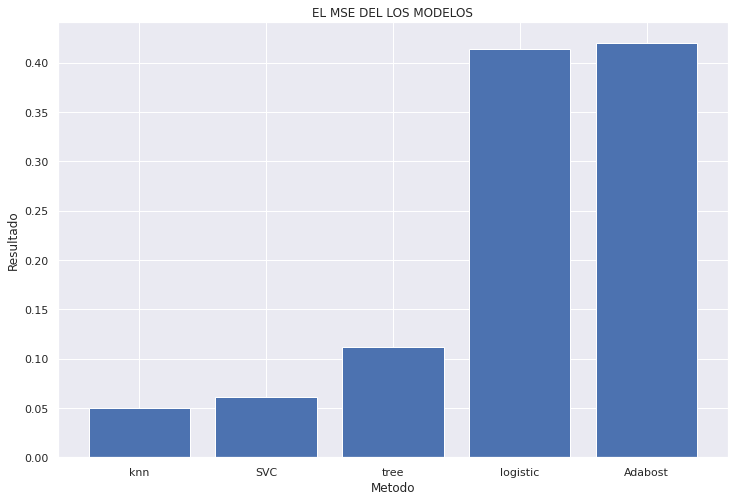

In [ ]:
x=tabla_mse['Método']
y=tabla_mse['Resultado']
plt.bar(x,y)
plt.title("EL MSE DEL LOS MODELOS")
plt.xlabel('Metodo')
plt.ylabel('Resultado')
plt.show()

Accuracy

In [ ]:
height1=[knn_accuracy,logistic_regression_accuracy,tree_accuracy,adabost_accuracy,svc_accuracy]
print(height1)

[0.95, 0.6409090909090909, 0.8878787878787879, 0.5893939393939394, 0.9393939393939394]


In [ ]:
x_modelo=['knn','logistic','tree','Adabost','svc']
x_modelo

['knn', 'logistic', 'tree', 'Adabost', 'svc']

In [ ]:
resultado_accuracy=list(zip(x_modelo,height1))
print(resultado_accuracy)

[('knn', 0.95), ('logistic', 0.6409090909090909), ('tree', 0.8878787878787879), ('Adabost', 0.5893939393939394), ('svc', 0.9393939393939394)]


In [ ]:
tabla = pd.DataFrame(resultado_accuracy, columns=['Método', 'Resultado'])
tabla=tabla.sort_values(by='Resultado',ascending=False)
tabla

,Método,Resultado
0,knn,0.950000
4,svc,0.939394
2,tree,0.887879
1,logistic,0.640909
3,Adabost,0.589394


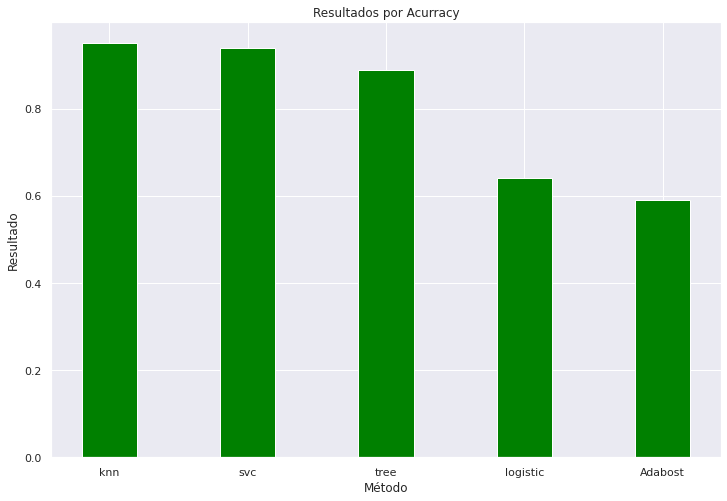

In [ ]:
x = tabla['Método']
y = tabla['Resultado']

plt.bar(x, y,color='green',width=0.4)
plt.xlabel('Método')
plt.ylabel('Resultado')
plt.title('Resultados por Acurracy')
plt.show()

# EL mejor modelo
1.   Support Vector Classifier
2.   KNN



Support Vector Classifier




In [ ]:
from sklearn.metrics import classification_report,confusion_matrix

In [ ]:
prediction=svc.predict(X_test)

In [ ]:
print(classification_report(y_test,prediction))

              precision    recall  f1-score   support

           0       0.99      0.95      0.97       165
           1       0.90      0.96      0.93       165
           2       0.90      0.92      0.91       165
           3       0.98      0.93      0.95       165

    accuracy                           0.94       660
   macro avg       0.94      0.94      0.94       660
weighted avg       0.94      0.94      0.94       660



In [ ]:
matrix=confusion_matrix(y_test,prediction)
print(matrix)

[[157   8   0   0]
 [  2 158   5   0]
 [  0  10 152   3]
 [  0   0  12 153]]


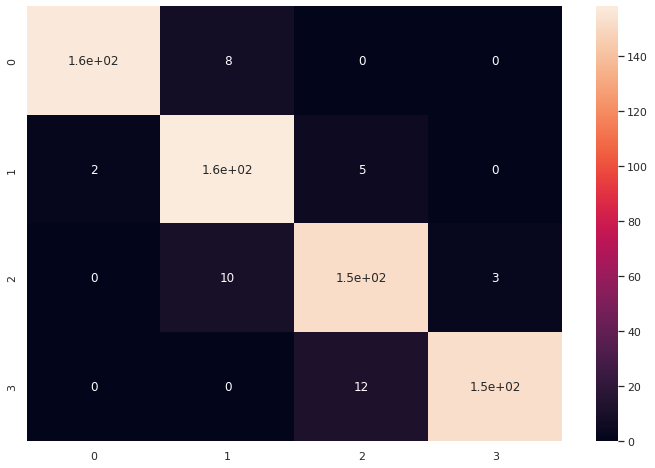

In [ ]:
sns.heatmap(matrix,annot=True)
plt.show()

In [ ]:
test_copy=test.copy()

In [ ]:
test_copy.head()

,id,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,...,pc,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi
0,1,1043,1,1.8,1,14,0,5,0.1,193,...,16,226,1412,3476,12,7,2,0,1,0
1,2,841,1,0.5,1,4,1,61,0.8,191,...,12,746,857,3895,6,0,7,1,0,0
2,3,1807,1,2.8,0,1,0,27,0.9,186,...,4,1270,1366,2396,17,10,10,0,1,1
3,4,1546,0,0.5,1,18,1,25,0.5,96,...,20,295,1752,3893,10,0,7,1,1,0
4,5,1434,0,1.4,0,11,1,49,0.5,108,...,18,749,810,1773,15,8,7,1,0,1


In [ ]:
test=test_copy.drop('id',axis=1)
test.head(4)

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,pc,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi
0,1043,1,1.8,1,14,0,5,0.1,193,3,16,226,1412,3476,12,7,2,0,1,0
1,841,1,0.5,1,4,1,61,0.8,191,5,12,746,857,3895,6,0,7,1,0,0
2,1807,1,2.8,0,1,0,27,0.9,186,3,4,1270,1366,2396,17,10,10,0,1,1
3,1546,0,0.5,1,18,1,25,0.5,96,8,20,295,1752,3893,10,0,7,1,1,0


In [ ]:
precio_predecir_SVC = pd.DataFrame(svc.predict(test), columns = ['precio_predecir_SVC'])

# Ensembling with kNN

In [ ]:
prediction=knn_classifier.predict(X_test)

In [ ]:
print(classification_report(y_test,prediction))

              precision    recall  f1-score   support

           0       0.99      0.97      0.98       165
           1       0.92      0.96      0.94       165
           2       0.91      0.93      0.92       165
           3       0.99      0.93      0.96       165

    accuracy                           0.95       660
   macro avg       0.95      0.95      0.95       660
weighted avg       0.95      0.95      0.95       660



In [ ]:
matrix=confusion_matrix(y_test,prediction)
print(matrix)

[[160   5   0   0]
 [  1 159   5   0]
 [  0   9 154   2]
 [  0   0  11 154]]


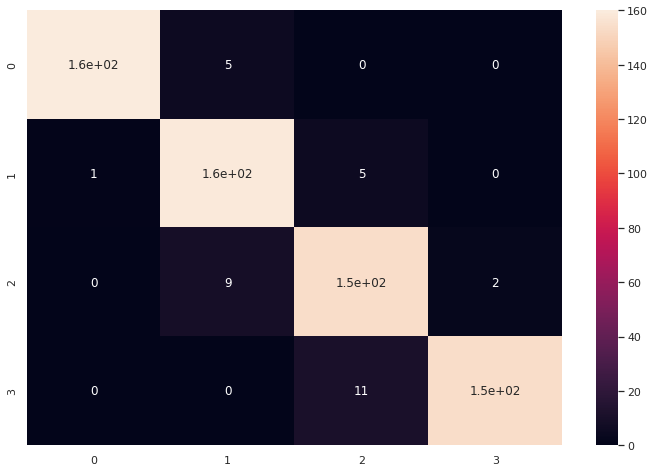

In [ ]:
sns.heatmap(matrix,annot=True)
plt.show()

In [ ]:
precio_predecir_Knn = pd.DataFrame(knn_classifier.predict(test), columns = ['precio_predecir_Knn'])

# Conclusiones Finales

In [ ]:
resultados = pd.DataFrame(index=precio_predecir_Knn.index, columns=['precio_predecir_SVC','precio_predecir_Knn'])
resultados['precio_predecir_SVC'] = precio_predecir_SVC
resultados['precio_predecir_Knn'] = precio_predecir_Knn
resultados

,precio_predecir_SVC,precio_predecir_Knn
0,3,3
1,3,3
2,2,2
3,3,3
4,1,1
...,...,...
995,2,2
996,1,1
997,0,0
998,2,2


In [ ]:
resultados['precio_predecir_Knn'].value_counts()

3    258
2    255
0    250
1    237
Name: precio_predecir_Knn, dtype: int64

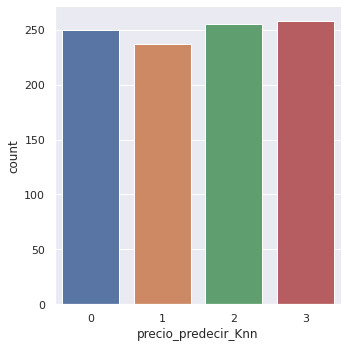

In [ ]:
sns.catplot('precio_predecir_Knn',data=resultados,kind='count')

In [ ]:
resultados['precio_predecir_SVC'].value_counts()

2    260
3    255
0    254
1    231
Name: precio_predecir_SVC, dtype: int64

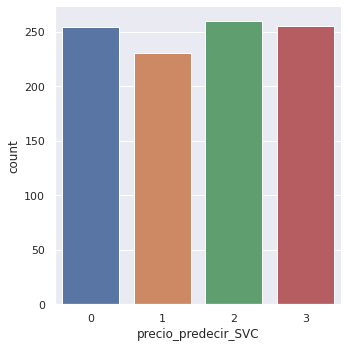

In [ ]:
sns.catplot('precio_predecir_SVC',data=resultados,kind='count')

# Conclusion final:
Se le recomienda a bod considerar los siguientes pronosticos:
1.   El mejor pronostivo se consigue por los modelos  KNN Classifier y Support Vector Classifier con un acurracy de 0.95 y 0.93 respectivamentes
2.  Ademas la causa principal que aumente los precios de los moviles es por el RAM esto se puede evidenciar en el mapa de calor.